#### Logistic Regression

In [1]:
# Import all the necessary libraries and modules
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# load the breast cancer data - sample dataset that we are using for this exercise
bc_data = datasets.load_breast_cancer()

In [ ]:
# Get X and y data using container object
X, y = bc_data.data, bc_data.target

In [ ]:
type(X), X.ndim

(numpy.ndarray, 2)

In [ ]:
# Data partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
X_train.shape, X_test.shape, y_train.shape

((426, 30), (143, 30), (426,))

In [ ]:
# Standardize the X data so in SGD process the weight and bias updates are more stable and appropriate
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert all numpy arrays to tensor objects
X_train = torch.from_numpy(X_train.astype('float32'))
X_test = torch.from_numpy(X_test.astype('float32'))
y_train = torch.from_numpy(y_train.astype('float32'))
y_test = torch.from_numpy(y_test.astype('float32'))

In [ ]:
# Convert y data from 1d to 2d tensor objects
y_train=y_train.reshape(len(y_train), 1)
y_test=y_test.reshape(len(y_test), 1)

In [ ]:
# Custom LR class. Only one layer with one neuron.

class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()

        # layer
        self.output = nn.Linear(in_size, out_size)

    def forward(self, x):
        preds = torch.sigmoid(self.output(x))
        return preds

In [ ]:
# Create model, loss and opt objects.
model = LR(X_train.shape[1], 1)
loss = nn.BCELoss()
opt = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# Model training process
bce_loss_vals = list()
for epoch in range(100):
    train_preds = model.forward(X_train)
    bce_loss = loss(train_preds, y_train)
    bce_loss_vals.append(bce_loss.item())
    bce_loss.backward() # gradients are computed
    opt.step()
    opt.zero_grad()

In [ ]:
# train loss
bce_loss

tensor(0.5119, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
# test loss
test_preds = model.forward(X_test)
logloss_test = loss(test_preds, y_test)
logloss_test

tensor(0.5158, grad_fn=<BinaryCrossEntropyBackward0>)

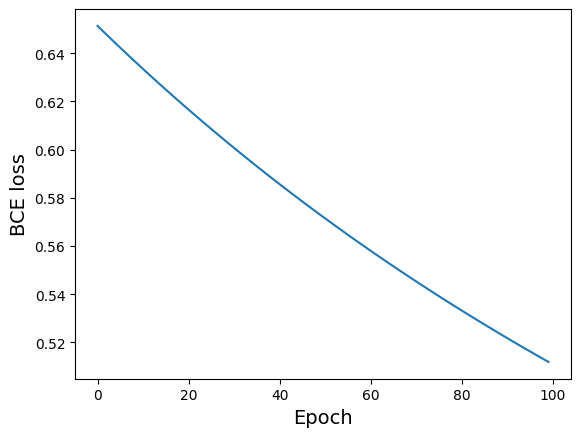

In [ ]:
# Epoch versus train loss
fig, ax = plt.subplots()
ax.plot(range(100), bce_loss_vals)
ax.set_xlabel("Epoch", size=14)
ax.set_ylabel("BCE loss", size=14)
plt.show()